In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [58]:
footballers = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey_players = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
d = {'footballers': pd.Series(footballers), 'hockey_players': pd.Series(hockey_players), 'weightlifters': pd.Series(weightlifters)}
df = pd.DataFrame(data=d)

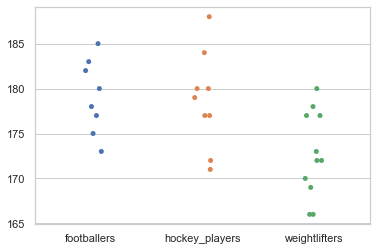

In [59]:
ax1 = sns.stripplot(data=df)

In [81]:
k = 3
n1 = len(footballers)
n2 = len(hockey_players)
n3 = len(weightlifters)
ni = np.array([n1, n2, n3])
n = np.sum(ni)
y1 = 1 / n1 * np.sum(footballers)
y2 = 1 / n2 * np.sum(hockey_players)
y3 = 1 / n3 * np.sum(weightlifters)
yi = np.array([y1, y2, y3])
y = 1 / n * np.sum(yi * ni)
S2 = np.sum((footballers - y)**2) + np.sum((hockey_players - y)**2) + np.sum((weightlifters - y)**2)
S2F = np.sum(ni * (yi - y)**2)
S2rest = np.sum((footballers - y1)**2) + np.sum((hockey_players - y2)**2) + np.sum((weightlifters - y3)**2)
S22 = S2F + S2rest
s_F = S2F / (k - 1)
s_rest = S2rest / (n - k)
F = s_F / s_rest

print(f"n1 = {n1}, n2 = {n2}, n3 = {n3}, n = {n}\ny1 = {y1:.2f}, y2 = {y2:.2f}, y3 = {y3:.2f}, y = {y:.2f}")
print(f"S2 = {S2:.2f}")
print(f"S2F = {S2F:.2f}")
print(f"S2rest = {S2rest:.2f}")
print(f"S22 = {S22:.2f}")
print(f"s_F = {s_F:.2f}")
print(f"s_rest = {s_rest:.2f}")
print(f"F = {F:.2f}")

n1 = 8, n2 = 9, n3 = 11, n = 28
y1 = 179.12, y2 = 178.67, y3 = 172.73, y = 176.46
S2 = 830.96
S2F = 253.91
S2rest = 577.06
S22 = 830.96
s_F = 126.95
s_rest = 23.08
F = 5.50


In [80]:
n-k

25

In [84]:
k-1

2

Табличный критерий Фишера 3.38 <br>
Расчетный 5.50

In [89]:
from scipy import stats
stats.f_oneway(footballers, hockey_players, weightlifters)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

P_value = 1% < alpha = 5% <br>
Верна альтернативная гипотеза <br>
Существует зависимость между ростом спортсмена и видом спорта